In [1]:
cd "d:/Large Scale Data Method/Part3"

d:\Large Scale Data Method\Part3


In [2]:
import os
os.listdir()

['.idea',
 '10k_bow',
 '10k_dic',
 'centroid88.txt',
 'clusters',
 'loadings',
 'loadings.tar.gz',
 'Multiprocessing.py',
 'SVD_Class.py',
 'test.py',
 'venv',
 '__pycache__']

In [68]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Import the topic loadings

In [53]:
topic_loadings = {}
topic_lst = [1,2,3,4,5,7,8,9,10,17,18,19]
for i in range(len(topic_lst)):
    with open('../loadings/topic_loading'+str(topic_lst[i]), 'rb') as f:
        load = pickle.load(f)
    load = np.abs(load)/np.linalg.norm(load)
    topic_loadings[topic_lst[i]] = load

In [54]:
with open('clusters', 'rb') as f:
    clusters = pickle.load(f)
with open('10k_dic', 'rb') as f:
    dictionary = pickle.load(f)

In [71]:
words = {}
loadings = {}
for i in range(len(topic_lst)):
    idx = topic_lst[i]
    top30_load = np.sort(topic_loadings[idx])[-30:][::-1]
    top30_idx = clusters[idx][topic_loadings[idx].argsort()[-30:][::-1]]
    top30_words = [dictionary[e] for e in top30_idx]
    loadings[idx] = top30_load
    words[idx] = top30_words

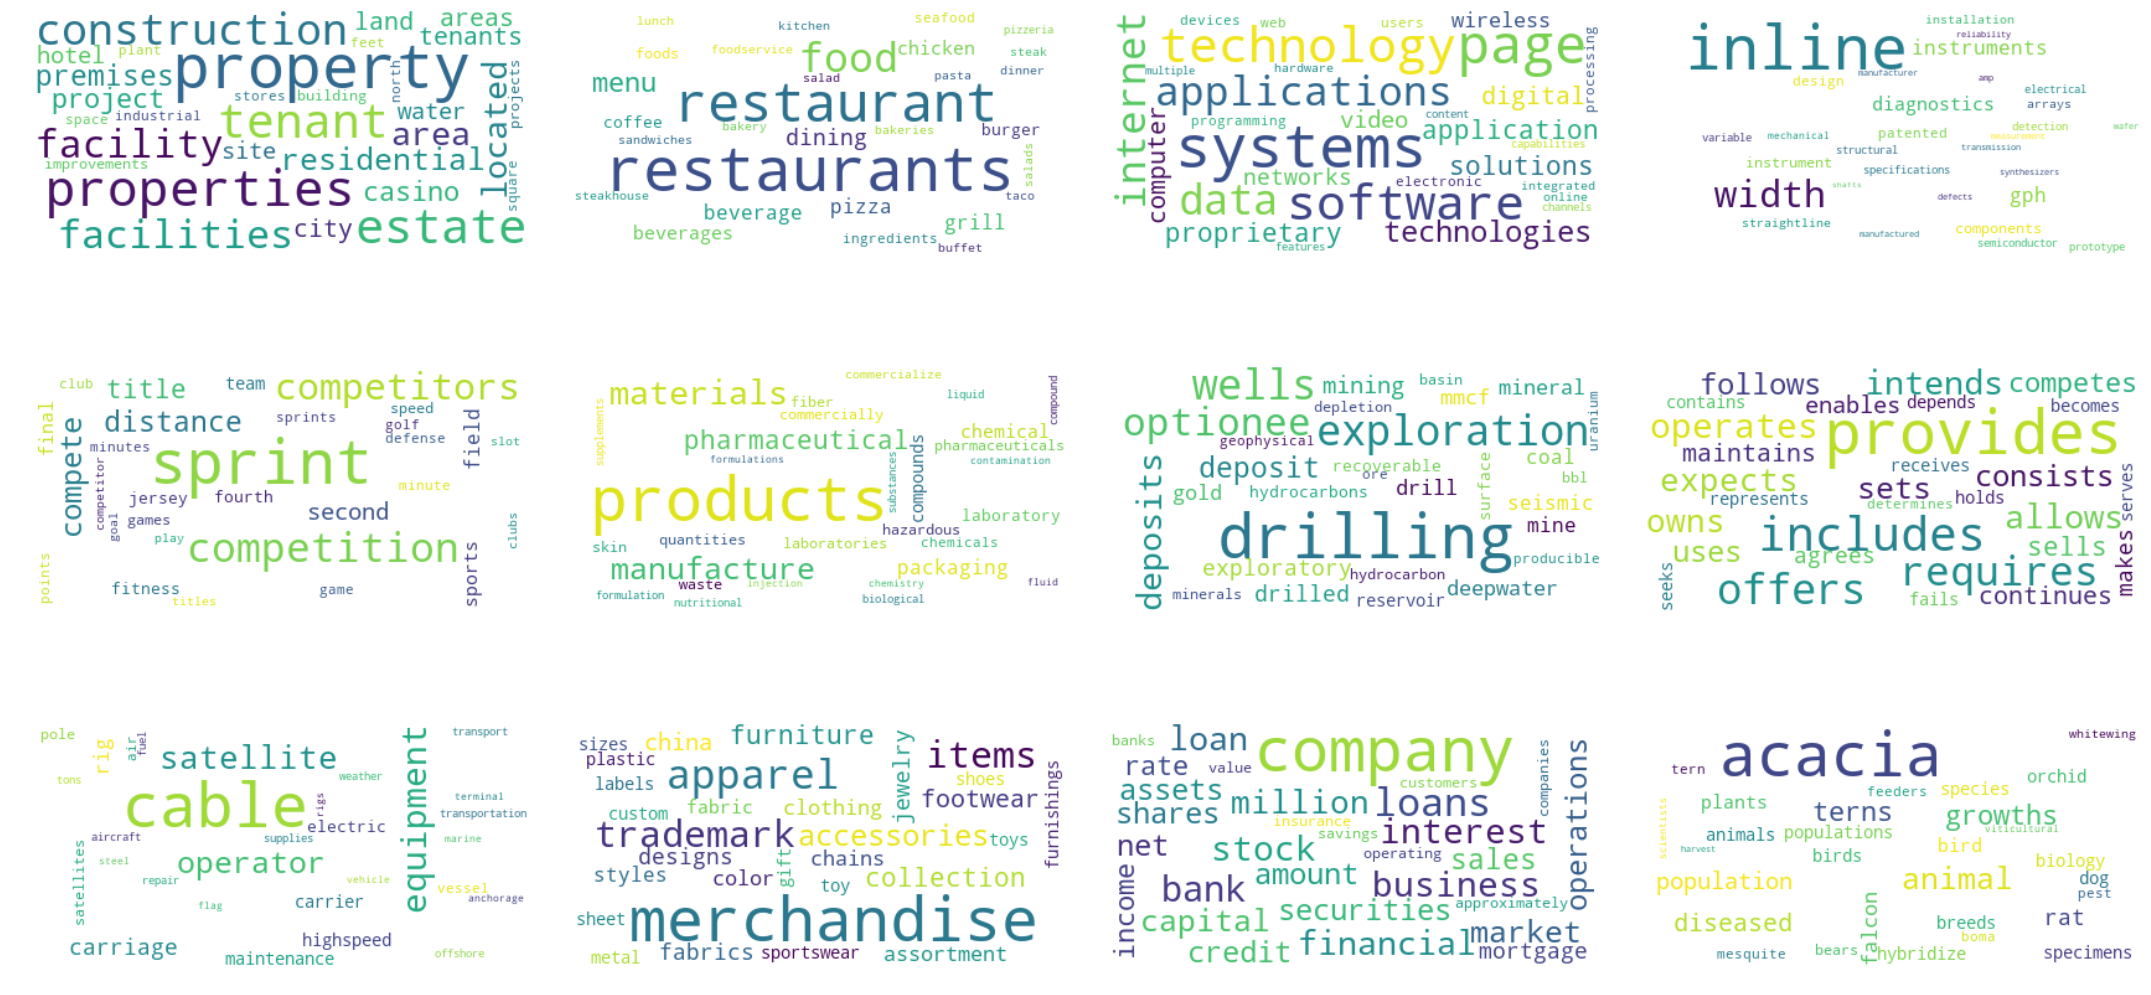

In [113]:
fig, axes = plt.subplots(3, 4)
fig.set_size_inches(h=15, w=30)
fig.tight_layout()
for i in range(12):
    ax = axes[i//4][i%4]
    idx = topic_lst[i]
    wordcloud = WordCloud(max_font_size=50, max_words=100, 
                          background_color="white").generate_from_frequencies({words[idx][i]:loadings[idx][i] 
                                                                                for i in range(30)})
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
plt.savefig("wordclouds.png")